In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [2]:
# list.files()

[1] "app_Genrich_DESeq2_analysis_diff_no_SVA.ipynb"                                                                             
[2] "app_Genrich_DESeq2_analysis_diff_no_SVA.r"                                                                                 
[3] "app_Genrich_DESeq2_analysis_diff_with_SVA.ipynb"                                                                           
[4] "app_Genrich_DESeq2_analysis_diff_with_SVA.r"                                                                               
[5] "extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.downregulated_peaks.log2FC.0.5.padj.0.1.bed"   
[6] "extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.downregulated.padj0.1_log2FC.minus.0.5.bed"
[7] "extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.upregulated.padj0.1_log2FC.plus.0.5.bed"   
[8] "extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.upregulated_peaks.log2FC.0.5.padj.0.1.bed"

In [3]:
down = import("extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.downregulated.padj0.1_log2FC.minus.0.5.bed", format='BED')
up = import("extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.upregulated.padj0.1_log2FC.plus.0.5.bed", format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 5997

[1] 7760

Initial peak counts:
Downregulated peaks: 5997 
Upregulated peaks: 7760 


In [4]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				5997 199.5
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			299

[a,c,g,t] frequencies in input data:				0.204168 0.295832 0.295832 0.204168
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 5
   spacedDyad: gaagannnnnnnnaaaat   motifConsensus: ArAAArArrAArmrArAA    0.20 fitness: -2384.66
   spacedDyad: aaannnnntctt         motifConsensus: yyTyyTyyTyCy          1.00 fitness: -1617.50
   spacedDyad: cctccnnnnnnnnnnaaaa  motifConsensus: CCsCCsCCsCCsCCsCCsC   0.90 f

In [5]:
# str(gadem_down)
# str(gadem_up)

In [6]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 3185 3651  690 1387

[1] "TyTyTTTyTyTTnyTTTy"     "nCCsCCkCCkCCkCCbCCbCCn" "nGGAGCTGs"             
[4] "nksCTGCwGn"

consensus

[1] "TyTyTTTyTyTTnyTTTy"

[1] "nCCsCCkCCkCCkCCbCCbCCn"

[1] "nGGAGCTGs"

[1] "nksCTGCwGn"

[1] NA

In [7]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 4939 3073 1730

[1] "nrGAGrrrGAGrnrGrrrrr" "ChsCnsCmsCwsCm"       "nGGsCwGGGn"

consensus

[1] "nrGAGrrrGAGrnrGrrrrr"

[1] "ChsCnsCmsCwsCm"

[1] "nGGsCwGGGn"

[1] NA

[1] NA

In [8]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [9]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 4

[1] 3

In [10]:
print("Motif Visualization")

[1] "Motif Visualization"


In [11]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.0572 0.0378 0.0607 0.1105 0.0929 0.0613 0.0431 0.1073 0.1550 0.0362 0.0773
C 0.1312 0.2505 0.2217 0.2913 0.1844 0.2067 0.2979 0.2947 0.1149 0.3311 0.2214
G 0.0575 0.1945 0.0704 0.0506 0.0958 0.0735 0.0249 0.0857 0.0466 0.1559 0.0428
T 0.7541 0.5172 0.6472 0.5476 0.6269 0.6585 0.6341 0.5122 0.6836 0.4768 0.6585
      12     13     14     15     16     17     18
A 0.1315 0.1760 0.0666 0.0165 0.0093 0.0594 0.1628
C 0.1587 0.1772 0.2997 0.2004 0.2719 0.2562 0.1882
G 0.0885 0.1415 0.1023 0.0155 0.0738 0.0325 0.0594
T 0.6212 0.5053 0.5313 0.7676 0.6450 0.6519 0.5896

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1389 0.0062 0.0336 0.0246 0.0043 0.0420 0.0606 0.0054 0.0172 0.0494 0.0084
C 0.3694 0.7245 0.7929 0.2627 0.7599 0.7008 0.2241 0.8799 0.8755 0.2093 0.8678
G 0.3296 0.1779 0.0768 0.4538 0.1579 0.1200 0.4515 0.0612 0.0371 0.4288 0.0593
T 0.1621 0.0914 0.0967 0.2589 0.0779 0.1372 0.2637 0.0535 0.0702 0.3124 0.0645
      12     13     14     15     16     17     18     19     20     21     22
A 0.0147 0.0705 0.0051 0.0330 0.0647 0.0103 0.0161 0.0519 0.0021 0.0295 0.1756
C 0.8468 0.2181 0.8279 0.7585 0.3026 0.7416 0.7650 0.2907 0.8051 0.7422 0.3859
G 0.0415 0.4250 0.0896 0.0943 0.3777 0.1596 0.0967 0.3219 0.1411 0.1456 0.2637
T 0.0970 0.2864 0.0773 0.1142 0.2550 0.0885 0.1222 0.3355 0.0516 0.0826 0.1748

$motif_3
       1      2      3      4      5      6      7      8      9
A 0.3564 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.0005 0.1922
C 0.1864 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.0005 0.3239
G 0.1952 0.9985 0.9985 0.0005 0.9985 0.0005 0.0005 0.9985 0.3927
T 0.2620 0.0005 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.0912

$motif_4
       1      2      3      4      5      6      7      8      9     10
A 0.1741 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.4042 0.0005 0.1818
C 0.3448 0.0005 0.3639 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.3186
G 0.2691 0.4907 0.6351 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.3499
T 0.2120 0.5083 0.0005 0.0005 0.9985 0.0005 0.0005 0.5948 0.0005 0.1497

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.2588 0.4457 0.1668 0.7694 0.2195 0.3749 0.4756 0.4489 0.1504 0.7005 0.2135
C 0.2466 0.0349 0.0860 0.0074 0.0349 0.0294 0.2468 0.0637 0.0397 0.1036 0.0448
G 0.3072 0.4414 0.7435 0.1951 0.7393 0.5915 0.2660 0.3460 0.8047 0.1739 0.7328
T 0.1873 0.0781 0.0037 0.0282 0.0064 0.0041 0.0116 0.1413 0.0051 0.0221 0.0090
      12     13     14     15     16     17     18     19     20
A 0.3458 0.3875 0.5180 0.1484 0.6014 0.2622 0.4442 0.4501 0.5327
C 0.1238 0.1933 0.0409 0.0829 0.0692 0.0985 0.0363 0.0427 0.0433
G 0.5232 0.3074 0.3881 0.7661 0.3141 0.5152 0.5146 0.4353 0.3988
T 0.0072 0.1118 0.0530 0.0025 0.0152 0.1242 0.0049 0.0718 0.0252

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.0005 0.3084 0.0005 0.0005 0.3295 0.0005 0.0005 0.3373 0.0005 0.0005 0.3396
C 0.9985 0.3383 0.4730 0.9985 0.2437 0.3574 0.9985 0.3698 0.4123 0.9985 0.2749
G 0.0005 0.0096 0.3564 0.0005 0.0983 0.4143 0.0005 0.0005 0.3646 0.0005 0.0070
T 0.0005 0.3438 0.1700 0.0005 0.3285 0.2278 0.0005 0.2925 0.2226 0.0005 0.3785
      12     13     14
A 0.0005 0.0005 0.2737
C 0.3785 0.9985 0.4918
G 0.3834 0.0005 0.0005
T 0.2376 0.0005 0.2339

$motif_3
       1      2      3      4      5      6      7      8      9     10
A 0.2640 0.0005 0.0005 0.0005 0.0005 0.4280 0.0005 0.0005 0.0005 0.2045
C 0.1407 0.0005 0.0005 0.4724 0.9985 0.0005 0.0005 0.0005 0.0005 0.3491
G 0.3686 0.9985 0.9985 0.5266 0.0005 0.0005 0.9985 0.9985 0.9985 0.2879
T 0.2267 0.0005 0.0005 0.0005 0.0005 0.5710 0.0005 0.0005 0.0005 0.1585

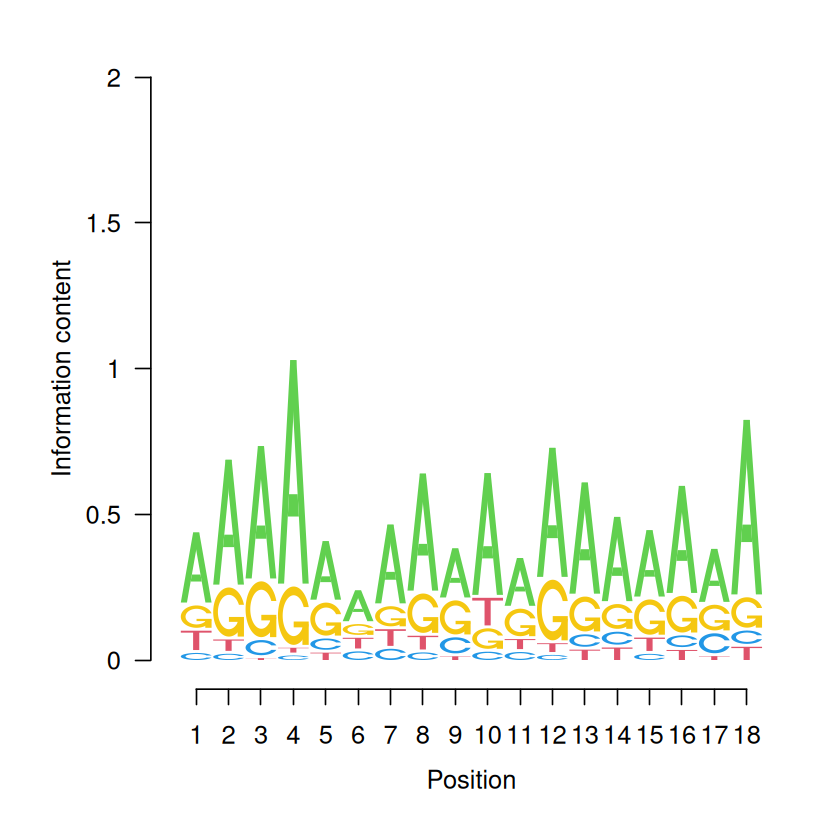

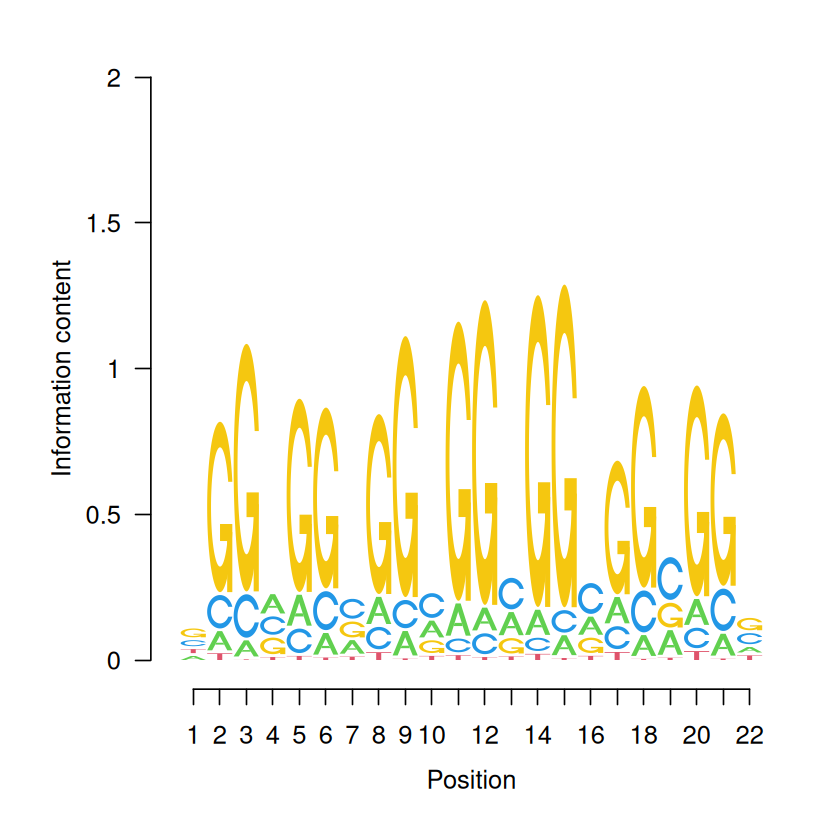

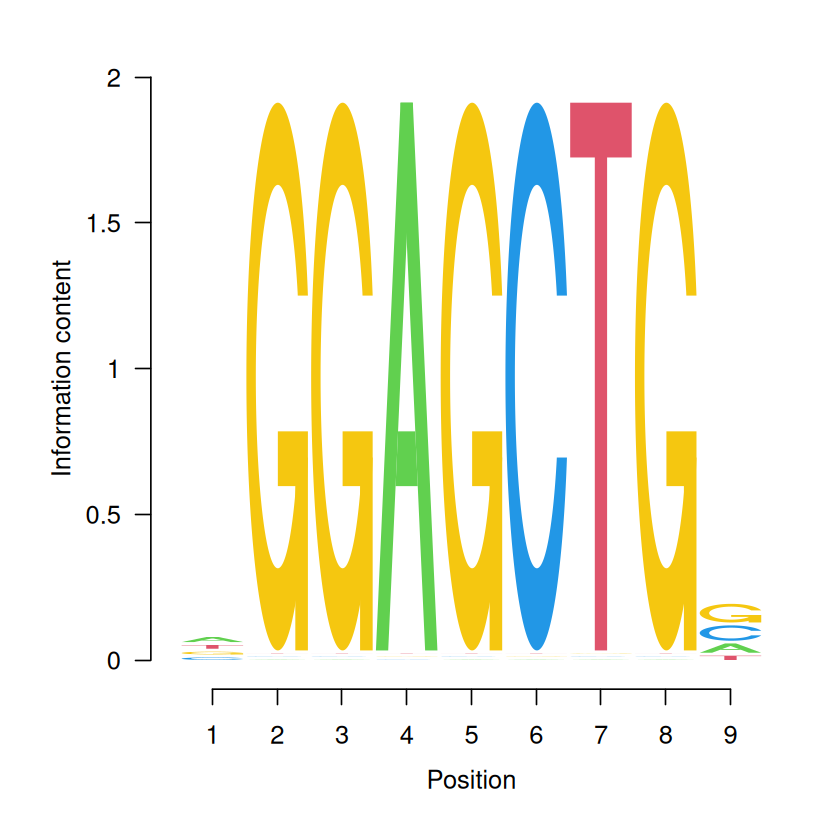

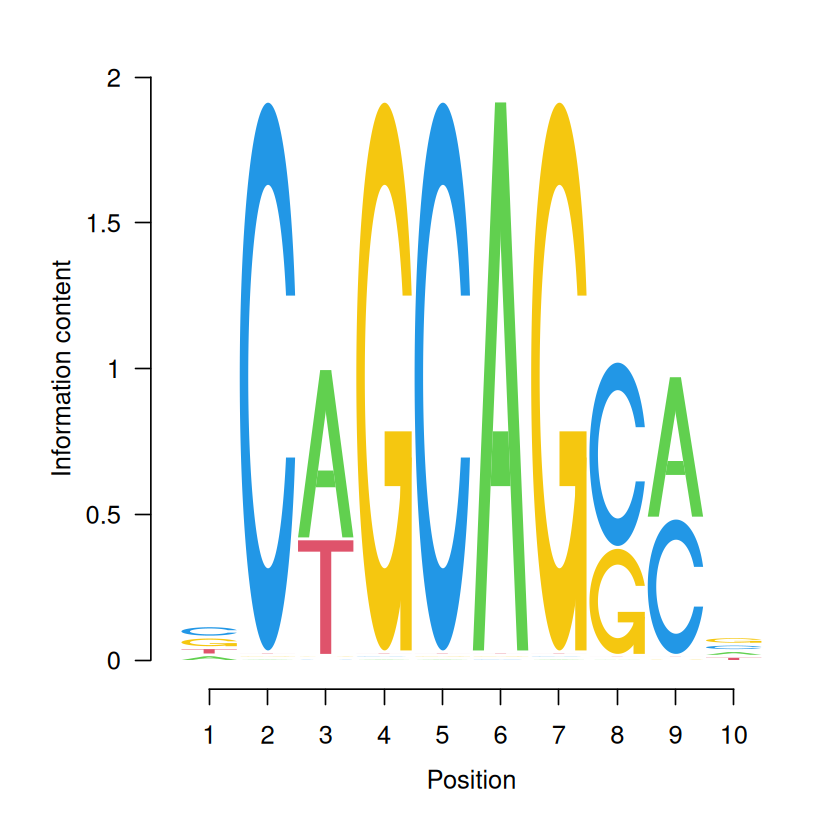

In [15]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(reverse_complement_pwm(pwm_list_down$motif_1))
seqLogo(reverse_complement_pwm(pwm_list_down$motif_2))
seqLogo(pwm_list_down$motif_3)
seqLogo(reverse_complement_pwm(pwm_list_down$motif_4))
# seqLogo(reverse_complement_pwm(pwm_list_down$motif_5))

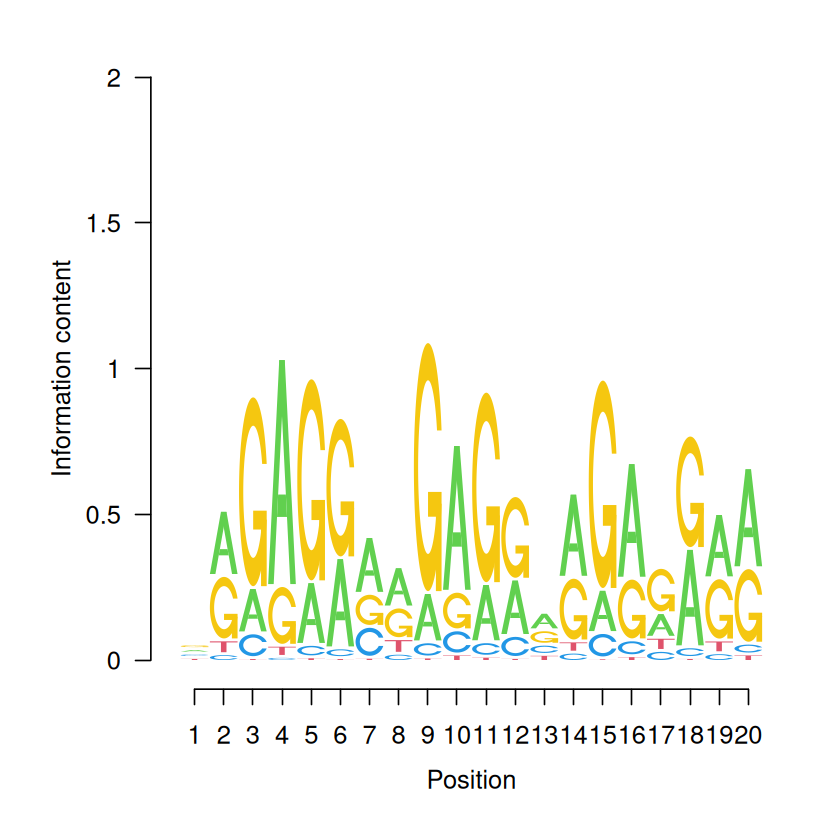

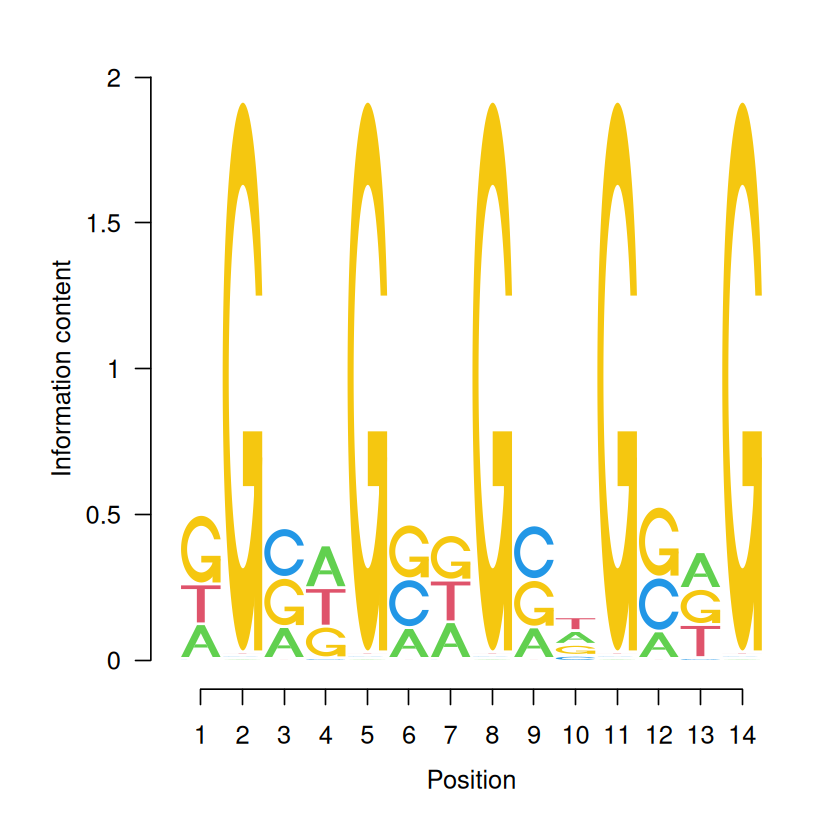

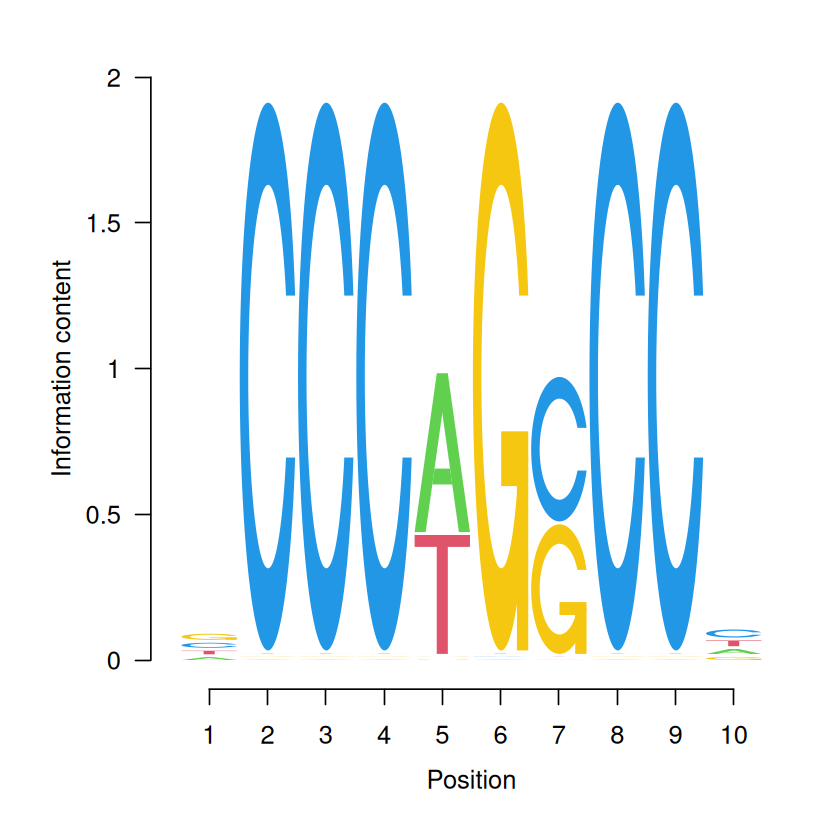

In [18]:
# seqLogo(reverse_complement_pwm(pwm_list_up$motif_1))
seqLogo(pwm_list_up$motif_1)
seqLogo(reverse_complement_pwm(pwm_list_up$motif_2))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_3))
# seqLogo(reverse_complement_pwm(pwm_list_up$motif_4))
# seqLogo(pwm_list_up$motif_5)

In [19]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [20]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 4 down-regulated motifs"
[1] "Created 3 up-regulated motifs"


In [21]:
# motifs_down_um
# motifs_up_um

In [22]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Up_motif_1
Down_motif_1        1.000        0.077        0.228        0.161      0.678
Down_motif_2        0.077        1.000        0.472        0.549      0.630
Down_motif_3        0.228        0.472        1.000        0.593      0.503
Down_motif_4        0.161        0.549        0.593        1.000      0.333
Up_motif_1          0.678        0.630        0.503        0.333      1.000
Up_motif_2          0.248        0.769        0.730        0.701      0.610
Up_motif_3          0.001        0.555        0.697        0.506      0.420
             Up_motif_2 Up_motif_3
Down_motif_1      0.248      0.001
Down_motif_2      0.769      0.555
Down_motif_3      0.730      0.697
Down_motif_4      0.701      0.506
Up_motif_1        0.610      0.420
Up_motif_2        1.000      0.633
Up_motif_3        0.633      1.000


In [24]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1      0.678      0.248      0.001
Down_motif_2      0.630      0.769      0.555
Down_motif_3      0.503      0.730      0.697
Down_motif_4      0.333      0.701      0.506


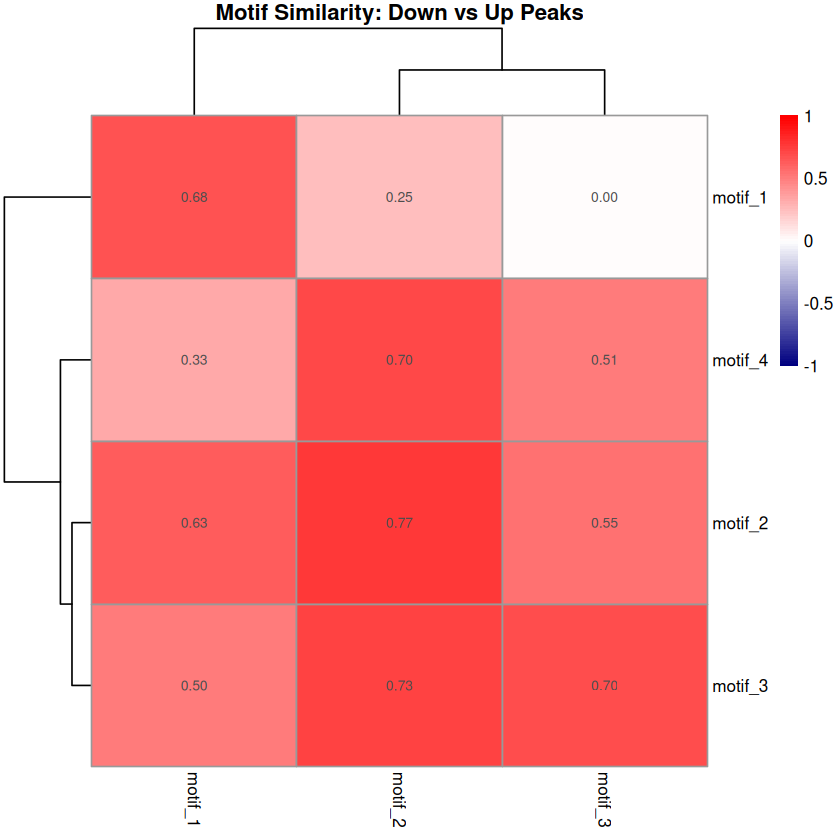

In [25]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [26]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
6     motif_2  motif_2  0.7685577
7     motif_3  motif_2  0.7295001
8     motif_4  motif_2  0.7005655
11    motif_3  motif_3  0.6970921
1     motif_1  motif_1  0.6778476
2     motif_2  motif_1  0.6302528
10    motif_2  motif_3  0.5545368
12    motif_4  motif_3  0.5060983
3     motif_3  motif_1  0.5033571
4     motif_4  motif_1  0.3325867
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif  Similarity
12    motif_4  motif_3 0.506098309
3     motif_3  motif_1 0.503357140
4     motif_4  motif_1 0.332586693
5     motif_1  motif_2 0.248003408
9     motif_1  motif_3 0.001343678


In [27]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric Value
1 Mean Similarity 0.529
2  Max Similarity 0.769
3  Min Similarity 0.001
4         Std Dev 0.231
5     Pairs > 0.5 9.000
6     Pairs > 0.7 3.000


In [28]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [29]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [30]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4
motif_1   0.593   0.686  -0.315  -0.222
motif_2  -0.377   0.035   0.143  -0.196
motif_3  -0.076   0.548   0.054   0.276


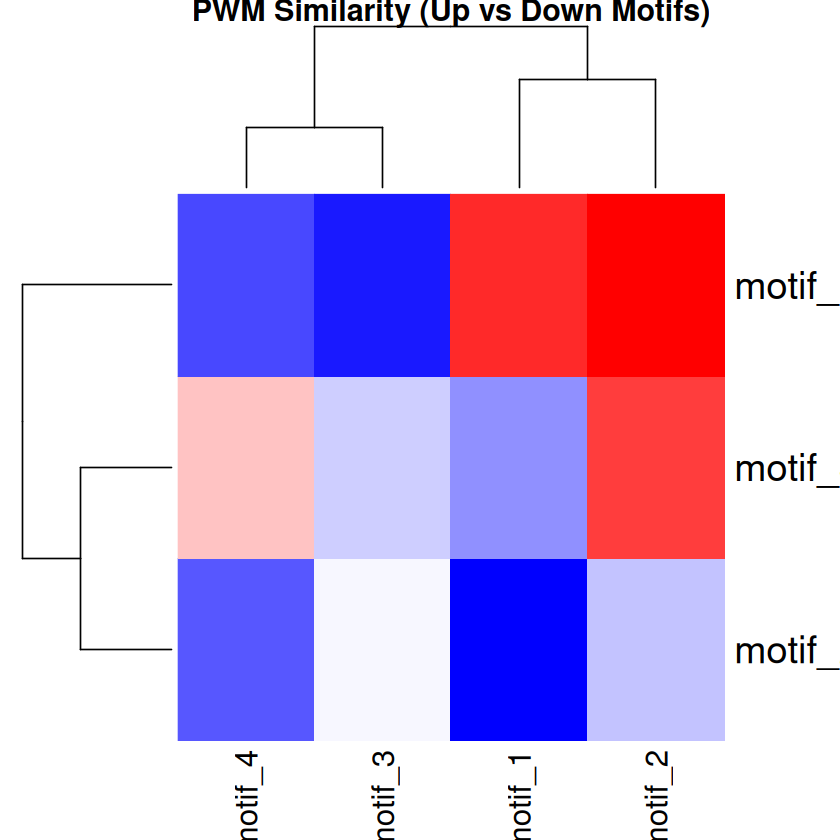

In [31]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")